<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/python/pandas_tutor_hu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bevezetés a pandas használatába

A pandas elsősorban táblázatos adatok hatékony kezelésére készült, ahol a táblázat soraiban eltérő típusú adatok találhatók. A pandas három alapvető adatszerkezetet kínál. A pandas-hoz a pd alias nevet szokták használni az importálásnál.

*   Series (sorozat, azonos típusú adatokból)
*   DataFrame (azonos rekordokból alkotott táblázat)
*   Index


##pandas sorozatok (Series)

A sorozatok hasonlítanak a *numpy* vektorokhoz. Egy sorozat értékekből és indexekből áll.

In [1]:
import pandas as pd

data = pd.Series([3.5, 4.2, 4.1, 5.4, 3.7])     # sorozat létrehozása
print(data.values)
print(data.index)

[3.5 4.2 4.1 5.4 3.7]
RangeIndex(start=0, stop=5, step=1)


A sorozatok elemeit index vagy index tartomány segítségével érhetjük el.

In [9]:
print(f"second item: {data[1]}")            # sorozat második eleme
print(f"last   item: {data.values[-1]}")    # sorozat utolsó eleme
print(f"items & indices:\n{data[:3]}")      # sorozat első három eleme
print(f"items  only\n{data.values[:3]}")    # sorozat első három elemének értékei

second item: 4.2
last   item: 3.7
items & indices:
0    3.5
1    4.2
2    4.1
dtype: float64
items  only
[3.5 4.2 4.1]


A legnagyobb különbség a numpy vektorok és a pandas sorozatok között az index. Numpy vektorokban at index nuláával kezdődik és egyesével növekszik, a numpy nem tárolja az indexet az elemek mellet. A pandas esetén viszont az index értékeket a felhasználó is megadhatja, egész vagy karakterlánc is lehet.


In [6]:
# indexelés karakterlánccal
data1 = pd.Series([6, 4, 2, 7, -2], index=['first', 'second', 'third', 'fourth', 'fifth'])
print(data1['first'])

6


In [7]:
# indexelés tetszőleges egész értékekkel
data2 = pd.Series([1, 2, 3], index=[32, 12, 45])
data2[45]

3

A sorozatokat Python szótárakkal is inicializálhatjuk.

In [8]:
data3 = pd.Series({'first': 6, 'second': 4, 'third': 2, 'fourth': 7, 'fifth': -2})
data3

first     6
second    4
third     2
fourth    7
fifth    -2
dtype: int64

## pandas adatkeretek

A pandas adatkeret a rekordok egy gyűjteménye, úgy képzelhetjük el mint egy táblázatot, ahol a táblázat oszlopainak neve van és azonos típusú adatokat tartalmaznak (mint egy relációs adatbázisban a táblák). Az egyes oszlopok pandas sorozatok.

In [13]:
# adatkeret létrehozása Python szótárból
df = pd.DataFrame({'val1': ['first', 'second', 'third', 'fourth', 'fifth'], 'val2': ['Joe', 'Jill', 'Fred', 'Ann', 'Jane']})
df

,val1,val2
0,first,Joe
1,second,Jill
2,third,Fred
3,fourth,Ann
4,fifth,Jane


Az adatkerethez is tartozik index.

In [14]:
df.index

RangeIndex(start=0, stop=5, step=1)

Index megadható a létrehozásnál.

In [17]:
df = pd.DataFrame(index=['first', 'second', 'third', 'fourth', 'fifth'], data=['Joe', 'Jill', 'Fred', 'Ann', 'Jane'], columns=['val'])
df

,val
first,Joe
second,Jill
third,Fred
fourth,Ann
fifth,Jane


Az oszlopokat (pandas sorozatok) a nevükkel érhetjük el.

In [19]:
df['val']

first      Joe
second    Jill
third     Fred
fourth     Ann
fifth     Jane
Name: val, dtype: object

Ha nem adunk meg indexet a létrehozásnál, akkor egész számok lesznek az indexek, nullától kezdve.

In [20]:
df1 = pd.DataFrame({'count':[5, 4, 6, 7, 3], 'name': ['table', 'chair', 'desk', 'cupboard', 'bed']})
df1

,count,name
0,5,table
1,4,chair
2,6,desk
3,7,cupboard
4,3,bed


In [ ]:
df2 = pd.DataFrame([5, 4, 6, 7, 3])
df2

,0
0,5
1,4
2,6
3,7
4,3


Néhány példa az adatok elérésére az adatkeretben.

In [38]:
print(df1['count'][2])      # az oszlop eleme
print('*'*22)
print(df1.iloc[1]['name'])  # a sorokat az iloc függvénnyel érhetjük el, azon belül az oszlopokat névvel
print('*'*22)
print(df1.iloc[1])          # sor sorszám alapján. 2. sor
print('*'*22)
print(df1.loc[3])           # index alapján 3-as indexű sor
print('*'*22)
print(df1.iat[1,1])         # sor és oszlop sorszám alapján
# iloc és loc esetén index kifejezéseket is megadhatunk
print('*'*22)
print(df1.iloc[::2])        # minden második sor
print('*'*22)
print(df1.loc[:3])          # első három sor index szerint

6
**********************
chair
**********************
count        4
name     chair
Name: 1, dtype: object
**********************
count           7
name     cupboard
Name: 3, dtype: object
**********************
chair
**********************
   count   name
0      5  table
2      6   desk
4      3    bed
**********************
   count      name
0      5     table
1      4     chair
2      6      desk
3      7  cupboard


Az adatkeretet CSV fájl tartalmával is inicializálhatjuk.

Létrehozunk egy koordináta listát tartalmaz CSV fájl.


In [39]:
sample_csv = """east,north,elev,dt
-97.4704,-175.0972,5.3846,2022-12-04 10:58:35
-97.4701,-175.0961,5.3903,2022-12-04 10:58:36
-97.4712,-175.0965,5.3937,2022-12-04 10:58:37
-97.4720,-175.0950,5.3913,2022-12-04 10:58:38
-97.4674,-175.1011,5.3912,2022-12-04 10:58:40
-97.4717,-175.0974,5.3925,2022-12-04 10:58:41
-97.4710,-175.0956,5.3897,2022-12-04 10:58:42
-97.4718,-175.0964,5.3845,2022-12-04 10:58:43
-97.4701,-175.0962,5.3843,2022-12-04 10:58:44
"""
with open('sample_data/sample.csv', 'w') as f:
    f.write(sample_csv)

Olvassuk be az adatokat a fájlból egy adatkeretbe!

Nézze meg, hogy a dátumot és időpontot tartalmazó oszlop kezelését!


In [41]:
df_csv = pd.read_csv('sample_data/sample.csv', parse_dates=['dt'])
df_csv.head()   # első öt sor

,east,north,elev,dt
0,-97.4704,-175.0972,5.3846,2022-12-04 10:58:35
1,-97.4701,-175.0961,5.3903,2022-12-04 10:58:36
2,-97.4712,-175.0965,5.3937,2022-12-04 10:58:37
3,-97.4720,-175.0950,5.3913,2022-12-04 10:58:38
4,-97.4674,-175.1011,5.3912,2022-12-04 10:58:40


Készítsünk egy grafikont az időpont és magasság oszlop alapján!

<Axes: title={'center': 'Elevation change'}, xlabel='time', ylabel='elevation'>

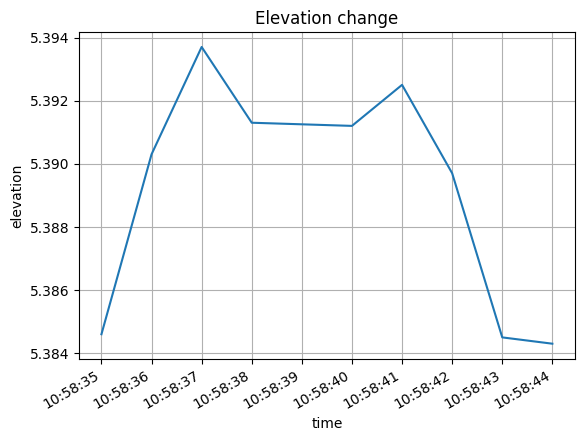

In [42]:
df_csv.plot(x="dt", y="elev", title="Magasság változás", grid=True, legend=False, xlabel="idő", ylabel="magasság")

## Számítások adatkeretekkel és sorozatokkal

Egy oszlop átlaga (sorozat)

In [43]:
df_csv['east'].mean()

-97.47063333333332

Összes numerikus oszlop átlaga.

In [44]:
df_csv.mean(numeric_only=True)

east     -97.470633
north   -175.096833
elev       5.389122
dtype: float64

Részletes statisztika a numerikus oszlopokról.

In [45]:
df_csv.describe()   # egy adatkeretet ad vissza

,east,north,elev
count,9.000000,9.000000,9.000000
mean,-97.470633,-175.096833,5.389122
std,0.001410,0.001760,0.003678
min,-97.472000,-175.101100,5.384300
25%,-97.471700,-175.097200,5.384600
50%,-97.471000,-175.096400,5.390300
75%,-97.470100,-175.096100,5.391300
max,-97.467400,-175.095000,5.393700


Koordináták átszámítása az első ponthoz képest relatív koordinátákká.

In [46]:
df_csv['east'] -= df_csv['east'][0]
df_csv['north'] -= df_csv['north'][0]
df_csv['elev'] -= df_csv['elev'][0]
df_csv

,east,north,elev,dt
0,0.0000,0.0000,0.0000,2022-12-04 10:58:35
1,0.0003,0.0011,0.0057,2022-12-04 10:58:36
2,-0.0008,0.0007,0.0091,2022-12-04 10:58:37
3,-0.0016,0.0022,0.0067,2022-12-04 10:58:38
4,0.0030,-0.0039,0.0066,2022-12-04 10:58:40
5,-0.0013,-0.0002,0.0079,2022-12-04 10:58:41
6,-0.0006,0.0016,0.0051,2022-12-04 10:58:42
7,-0.0014,0.0008,-0.0001,2022-12-04 10:58:43
8,0.0003,0.0010,-0.0003,2022-12-04 10:58:44


Adatkeret bővítése új oszloppal.

In [47]:
# 3D távolság számítás az összes sorra az origótól
df_csv['dist'] = (df_csv['east']**2 + df_csv['north']**2 + df_csv['elev']**2)**0.5
df_csv

,east,north,elev,dt,dist
0,0.0000,0.0000,0.0000,2022-12-04 10:58:35,0.000000
1,0.0003,0.0011,0.0057,2022-12-04 10:58:36,0.005813
2,-0.0008,0.0007,0.0091,2022-12-04 10:58:37,0.009162
3,-0.0016,0.0022,0.0067,2022-12-04 10:58:38,0.007231
4,0.0030,-0.0039,0.0066,2022-12-04 10:58:40,0.008232
5,-0.0013,-0.0002,0.0079,2022-12-04 10:58:41,0.008009
6,-0.0006,0.0016,0.0051,2022-12-04 10:58:42,0.005379
7,-0.0014,0.0008,-0.0001,2022-12-04 10:58:43,0.001616
8,0.0003,0.0010,-0.0003,2022-12-04 10:58:44,0.001086


## Adatok szűrése az adatkeretből

Vertikális szűkítés oszlopokra.

In [48]:
df_csv[['dt', 'elev']]

,dt,elev
0,2022-12-04 10:58:35,0.0000
1,2022-12-04 10:58:36,0.0057
2,2022-12-04 10:58:37,0.0091
3,2022-12-04 10:58:38,0.0067
4,2022-12-04 10:58:40,0.0066
5,2022-12-04 10:58:41,0.0079
6,2022-12-04 10:58:42,0.0051
7,2022-12-04 10:58:43,-0.0001
8,2022-12-04 10:58:44,-0.0003


Horizontális szűkítés sorokra.

In [53]:
from datetime import datetime
dat = datetime.strptime("2022-12-04 10:58:40", "%Y-%m-%d %H:%M:%S") # karakterláncból dátum-időpont adat
a = df_csv.loc[df_csv['dt'] > dat]      # adott időpont utáni adatok
print(a)
print('*'*60)
# alternatív megoldás
df_csv[df_csv['dt'] > dat]
# olvashatóbb változat
print(df_csv.query("dt > @dat"))

     east   north    elev                  dt      dist
5 -0.0013 -0.0002  0.0079 2022-12-04 10:58:41  0.008009
6 -0.0006  0.0016  0.0051 2022-12-04 10:58:42  0.005379
7 -0.0014  0.0008 -0.0001 2022-12-04 10:58:43  0.001616
8  0.0003  0.0010 -0.0003 2022-12-04 10:58:44  0.001086
************************************************************
     east   north    elev                  dt      dist
5 -0.0013 -0.0002  0.0079 2022-12-04 10:58:41  0.008009
6 -0.0006  0.0016  0.0051 2022-12-04 10:58:42  0.005379
7 -0.0014  0.0008 -0.0001 2022-12-04 10:58:43  0.001616
8  0.0003  0.0010 -0.0003 2022-12-04 10:58:44  0.001086


Több oszlop idő szerinti grafikonja egy ábrában

<Axes: xlabel='dt'>

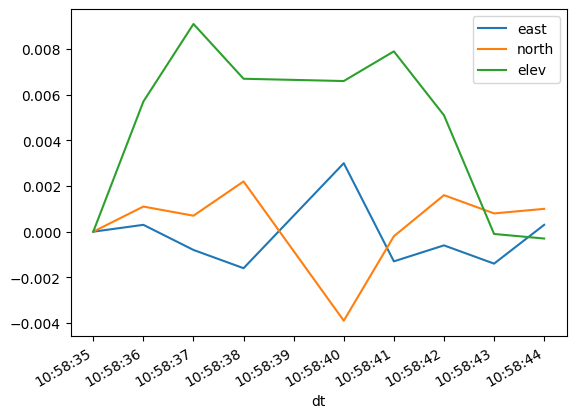

In [54]:
df_csv.plot(x = "dt", y=["east", "north", "elev"])